## Bulldozers price prediction using machine learning
* We are going to predict price of Bulldozer with the help of Machine Learning 
* In this project we will try diffrent methods and models to predict the best  price with best accuracy and precision.
* We will study the data and based on that we will get the best method to predict the value or price.


## 1)Data
* This data is taken from Kaggle Bluebook : https://www.kaggle.com/c/bluebook-for-bulldozers/data

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 2)Evaluation
* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
* the goal for most regression evaluation metrics is to minimize the error.

## 3)Features

* Kaggle have this data dictionary detailing all of the feature of the dataset. You can view this data dictionary onm Google sheets : https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [191]:
# imorting all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
%matplotlib inline

#  importing modeling libary
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score


In [6]:
# importing data with pandas
# parsing dates
data = pd.read_csv("bull dozers data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [7]:
data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info

<bound method DataFrame.info of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand   

In [9]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [10]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

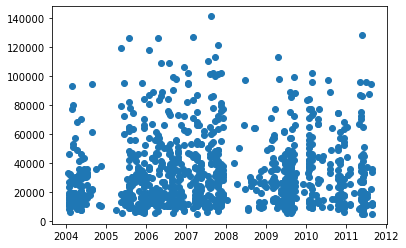

In [11]:
np.random.seed(3)
fig, ax=plt.subplots()
ax.scatter(data["saledate"][:1000],data["SalePrice"][:1000]);

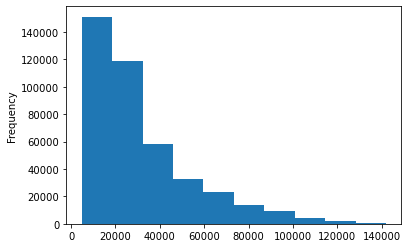

In [12]:
data.SalePrice.plot.hist();

In [13]:
# sorting some data
data.sort_values(by=["saledate"], inplace=True, ascending=True)
data.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [14]:
df=data.copy()

In [15]:
df.saledate.head(5)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [16]:
#  adding dtetime parameters for saledate column
df["saledate"]=pd.to_datetime(df["saledate"])
df["saleyear"]=pd.DatetimeIndex(df["saledate"]).year
df["salemonth"]=pd.DatetimeIndex(df["saledate"]).month
df["saleday"]=pd.DatetimeIndex(df["saledate"]).day
# removing saledate column
df.drop("saledate", axis=1, inplace=True)

In [17]:
df.T.tail(3)

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
saleyear,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
salemonth,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
saleday,17,31,31,31,31,31,31,31,31,31,...,28,28,28,28,28,28,28,28,28,28


In [26]:
# checking and rearrenging missing data ones
# converting char to numbers
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [25]:
df.ProductSize .cat.codes

205615    3
274835   -1
141296    1
212552   -1
62755    -1
         ..
410879   -1
412476   -1
411927    4
407124   -1
409203   -1
Length: 412698, dtype: int8

In [29]:
#  finding and filling missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=content.fillna(content.median())

In [32]:
df.auctioneerID_is_missing.value_counts()


False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [34]:
for key, value in df.items():
    if not pd.api.types.is_numeric_dtype(value):
        df[key+"_is_missing"]=pd.isnull(value)
        df[key]=pd.Categorical(value).codes+1

In [37]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [38]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

as we dont have any missing values now we proceed to modeling
## 4)Modeling

In [48]:
# modeling and fitting data
%time

model = RandomForestRegressor(n_jobs=-1, random_state=3)
x=df.drop("SalePrice", axis=1)
y=df["SalePrice"]
model = model.fit(x, y)

CPU times: total: 0 ns
Wall time: 999 µs


In [50]:
%time
model.score(x, y)

CPU times: total: 0 ns
Wall time: 0 ns


0.9875084329644488

In [51]:
# splitting data
df_train=df[df.saleyear!=2012]
df_val=df[df.saleyear==2012]
x_train, y_train=df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
x_val, y_val=df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

In [54]:
x_train


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393098,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
400217,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
400302,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
400393,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


## 5)Evaluation

In [68]:
# function for rmsle
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
# evaluation model function
def show_score(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_val)
    scores={"training MAE": mean_absolute_error(y_train, train_preds),
            "val_mae": mean_absolute_error(y_val, val_preds),
            "val rsmle": rmsle(y_val, val_preds),
            "training rmsle":rmsle(y_train, train_preds),
            "training r2": r2_score(y_train, train_preds),
            "val r2": r2_score(y_val, val_preds)}
    return scores  

## Training on subsets
* as we have huge data size we will try reducing and traing on them


In [62]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(x_train, y_train)

CPU times: total: 1min 7s
Wall time: 12.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [69]:
show_score(model)

{'training MAE': 5530.530904705516,
 'val_mae': 7090.753389786572,
 'val rsmle': 0.2895513455735602,
 'training rmsle': 0.25647273079766847,
 'training r2': 0.8620882220528066,
 'val r2': 0.8346268881678072}

## 6)Tunning hyparparameters

In [98]:
rfcv={"n_estimators": np.arange(70, 120, 10),
      "max_depth":[None, 3, 15, 10],
      "min_samples_split":np.arange(2, 10, 2),
       "min_samples_leaf":np.arange(10, 20, 2),
       "max_features":[0.5, 1, "sqrt", "auto"]}
rfcv_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=3, max_samples=10000),
                              param_distributions=rfcv,
                              n_iter=10,
                              cv=5,
                              verbose=True)

In [99]:
rfcv_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=3),
                   param_distributions={'max_depth': [None, 3, 15, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([10, 12, 14, 16, 18]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 70,  80,  90, 100, 110])},
                   verbose=True)

In [101]:
rfcv_model.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 16,
 'max_features': 0.5,
 'max_depth': 15}

In [102]:
show_score(rfcv_model)

{'training MAE': 6728.730369968445,
 'val_mae': 8006.902967653615,
 'val rsmle': 0.32134468747671596,
 'training rmsle': 0.30147577868185066,
 'training r2': 0.8015129355669572,
 'val r2': 0.7897511913526142}

In [106]:
ideal_model=RandomForestRegressor(n_estimators=40,
             min_samples_leaf=1,
             min_samples_split=14,
             max_features=0.5,
             n_jobs=-1,
             max_samples=None)
ideal_model.fit(x_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [117]:
show_score(xx)

{'training MAE': 4858.429486661001,
 'val_mae': 6280.88499951945,
 'val rsmle': 0.25400402998977173,
 'training rmsle': 0.2257680278722936,
 'training r2': 0.8935211304400963,
 'val r2': 0.865698498453503}

In [118]:
show_score(ideal_model)

{'training MAE': 3010.1032424275977,
 'val_mae': 5920.0651519365265,
 'val rsmle': 0.2430160643760966,
 'training rmsle': 0.1468293746640494,
 'training r2': 0.9575268846822507,
 'val r2': 0.8822162563436057}

## Making predictions on test data

In [215]:
df_test= pd.read_csv("bull dozers data/Test.csv", low_memory=False, parse_dates=["saledate"])

In [216]:
df_test.T.head()

,0,1,2,3,4,5,6,7,8,9,...,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456
SalesID,1227829,1227844,1227847,1227848,1227863,1227870,1227871,1227879,1227880,1227881,...,6643158,6643164,6643167,6643168,6643170,6643171,6643173,6643184,6643186,6643196
MachineID,1006309,1022817,1031560,56204,1053887,1068694,1012262,1064696,1067175,1007429,...,2556488,1894070,2558314,2558315,2558316,2558317,2558332,2558342,2558343,2558346
ModelID,3168,7271,22805,1269,22312,16747,9133,4699,22145,423,...,21434,21438,21450,21450,21450,21450,21434,21437,21437,21446
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3,3,3,3,3,3,3,3,3,3,...,99,99,2,2,2,2,2,2,2,2


As you can see the saleprice is missing as its Test data

so we need to preprocess the data 

In [217]:
def preprodata(data):
    
    data["saleyear"]=pd.DatetimeIndex(data["saledate"]).year
    data["salemonth"]=pd.DatetimeIndex(data["saledate"]).month
    data["saleday"]=pd.DatetimeIndex(data["saledate"]).day
    data.drop("saledate", axis=1, inplace=True)

    for label, content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[label]=content.astype("category").cat.as_ordered()

    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                data[label+"_is_missing"]=pd.isnull(content)
                data[label]=content.fillna(content.median())
            
    for key, value in data.items():
        if not pd.api.types.is_numeric_dtype(value):
            data[key+"_is_missing"]=pd.isnull(value)
            data[key]=pd.Categorical(value).codes+1
    return data

In [218]:
df_test=preprodata(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [219]:
set(x_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [220]:
df_test["auctioneerID_is_missing"]=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [221]:
test_preds=ideal_model.predict(df_test)
warnings.filterwarnings("ignore")
test_preds


array([20480.70992419, 24548.45102186, 51178.99917538, ...,
       13442.97689735, 17638.58776681, 28855.54616952])

In [222]:
df_pred=pd.DataFrame()
df_pred["SalesID"]=df_test["SalesID"]
df_pred["SalesPrices"]=test_preds
df_pred

,SalesID,SalesPrices
0,1227829,20480.709924
1,1227844,24548.451022
2,1227847,51178.999175
3,1227848,62370.941482
4,1227863,42219.354399
...,...,...
12452,6643171,40346.383302
12453,6643173,13390.655301
12454,6643184,13442.976897
12455,6643186,17638.587767


In [223]:
df_pred.to_csv("bull dozers data/Test_predictions.csv", index=False)

## 7)Freature importance

In [224]:
id=ideal_model.feature_importances_
id

array([3.40167964e-02, 2.00116544e-02, 3.97902368e-02, 1.88483457e-03,
       3.72298359e-03, 2.03553593e-01, 3.30347251e-03, 1.03762031e-03,
       4.43747840e-02, 5.19450056e-02, 6.78202608e-02, 4.59250338e-03,
       1.93239583e-02, 1.39613481e-01, 4.02719273e-02, 6.79915507e-03,
       2.25594974e-03, 2.38146113e-03, 4.23491796e-03, 6.85773239e-02,
       7.14179757e-04, 4.33417157e-05, 8.21548242e-04, 2.22891047e-04,
       1.32422059e-03, 2.21483765e-04, 2.02825522e-03, 3.12082478e-03,
       5.36156858e-04, 2.09220307e-03, 2.38493088e-03, 1.60447107e-03,
       4.33616069e-03, 1.37554925e-03, 9.20874847e-04, 1.17582991e-02,
       9.05801005e-04, 1.06866280e-02, 3.36728910e-03, 1.26479740e-03,
       8.92741829e-04, 8.44329888e-04, 1.17729991e-03, 8.24748134e-04,
       7.47404016e-04, 3.74494360e-04, 7.10378761e-04, 2.36466916e-03,
       7.33179132e-04, 2.45962657e-04, 3.20036849e-04, 7.48178367e-02,
       8.02615649e-03, 6.54359373e-03, 2.90212803e-04, 1.53372039e-03,
      

Text(0, 0.5, 'Features')

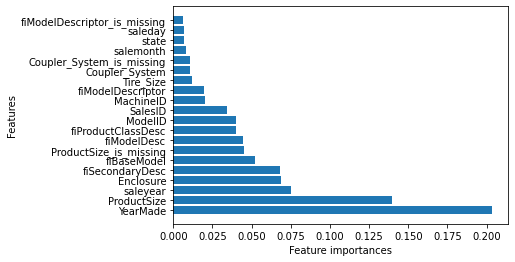

In [230]:
df=(pd.DataFrame({"feature": x_train.columns,
                 "feature_importances":id})
               .sort_values("feature_importances", ascending=False)
               .reset_index(drop=True))
fig, ax=plt.subplots()
ax.barh(df["feature"][:20], df["feature_importances"][:20])
ax.set_xlabel("Feature importances")
ax.set_ylabel("Features")